# **Traffic Signs Classification**

In [1]:
from google.colab import drive
import pickle as pkl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils import shuffle
from imgaug import augmenters  as iaa
import cv2
import random

**1- Mount google drive and import dataset**



In [2]:
#mount google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
training_file = "/content/drive/My Drive/training_data_trafficsigns/train.p"
validation_file= "/content/drive/My Drive/training_data_trafficsigns/valid.p"
testing_file = "/content/drive/My Drive/training_data_trafficsigns/test.p"

with open(training_file, mode='rb') as f:
    train = pkl.load(f)
with open(validation_file, mode='rb') as f:
    valid = pkl.load(f)
with open(testing_file, mode='rb') as f:
    test = pkl.load(f)

In [4]:
WIDTH = 32
HEIGHT = 32

In [5]:
X_train = train['features']
y_train = train['labels']

print(X_train.shape)
print(y_train.shape)

(34799, 32, 32, 3)
(34799,)


In [6]:
X_valid = valid['features']
y_valid = valid['labels']

X_valid = np.array(X_valid)
y_valid = np.array(y_valid)

print(X_valid.shape)
print(y_valid.shape)

(4410, 32, 32, 3)
(4410,)


**2- About the Dataset**

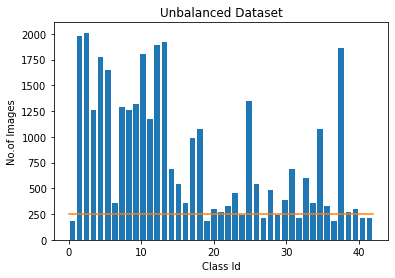

In [9]:
num_bins = 43
samples_per_bin = 250
plt.hist(y_train, bins =num_bins,rwidth=0.8)
plt.plot((np.min(y_train), np.max(y_train)), (samples_per_bin, samples_per_bin))
plt.title('Unbalanced Dataset')
plt.xlabel('Class Id')
plt.ylabel('No.of Images')
plt.show()

_, bins = np.histogram(y_train, num_bins)

In [8]:
print(bins)

[ 0.          0.97674419  1.95348837  2.93023256  3.90697674  4.88372093
  5.86046512  6.8372093   7.81395349  8.79069767  9.76744186 10.74418605
 11.72093023 12.69767442 13.6744186  14.65116279 15.62790698 16.60465116
 17.58139535 18.55813953 19.53488372 20.51162791 21.48837209 22.46511628
 23.44186047 24.41860465 25.39534884 26.37209302 27.34883721 28.3255814
 29.30232558 30.27906977 31.25581395 32.23255814 33.20930233 34.18604651
 35.1627907  36.13953488 37.11627907 38.09302326 39.06976744 40.04651163
 41.02325581 42.        ]


In [10]:
#Balance the data
print ('total data:', len(X_train))
remove_list = []
for j in range(num_bins):
  list_ = []
  for i in range(len(y_train)):
    if y_train[i]>= bins[j] and y_train[i]<=bins[j+1]:
      list_.append(i)
  list_ = shuffle(list_)
  #print(list_)
  if len(list_)>samples_per_bin:
    list_ = list_[samples_per_bin:]
    remove_list.extend(list_)

print('removed:', len(remove_list))

X_train = np.delete(X_train, remove_list, axis=0)
print ('remaining images:', len (X_train))

y_train = np.delete(y_train, remove_list, axis=0)
print ('remaining labels:', len (y_train))

total data: 34799
removed: 24439
remaining images: 10360
remaining labels: 10360


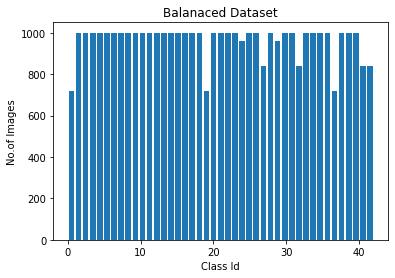

In [ ]:
num_bins = 43
samples_per_bin = 500
plt.hist(y_train, bins =num_bins,rwidth=0.8)
plt.title('Balanaced Dataset')
plt.xlabel('Class Id')
plt.ylabel('No.of Images')
plt.show()

**3- Image Augmentation to Artifically Expand the Dataset**

In [ ]:
#image augmentation
def zoom(image):
  zoom_img = iaa.Affine(scale = (0.9, 1.3))
  image = zoom_img.augment_image(image)
  return image

39


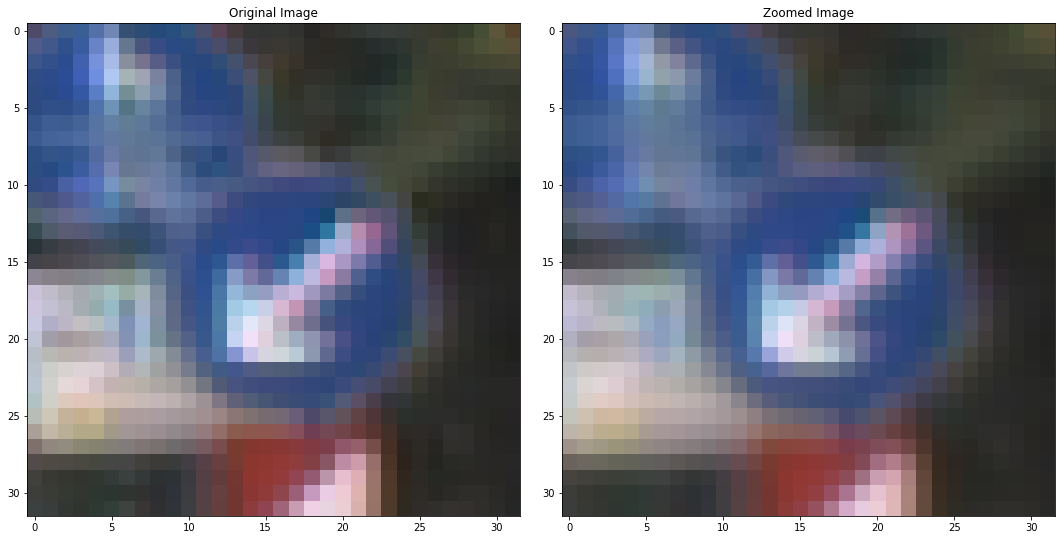

In [ ]:
index = random.randint(0,len(X_train)-1)
image= X_train[index]
label= y_train [index]
zoomed_image = zoom(image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(image)
axs[0].set_title('Original Image')
axs[1].imshow(zoomed_image)
axs[1].set_title('Zoomed Image')

print(label)

In [ ]:
def pan(image):
  pan = iaa.Affine(translate_percent={'x': (-0.1, 0.1), 'y': (-0.1, 0.1)})
  image = pan.augment_image(image)
  return image

36


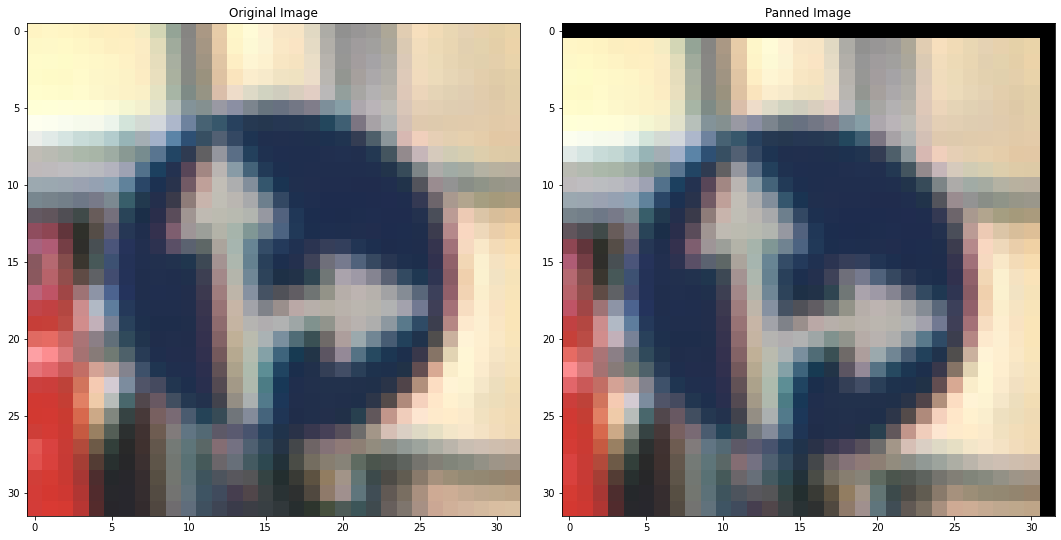

In [ ]:
index = random.randint(0,len(X_train)-1)
image= X_train[index]
label= y_train [index]
panned_image = pan(image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(image)
axs[0].set_title('Original Image')
axs[1].imshow(panned_image)
axs[1].set_title('Panned Image')

print(label)

In [ ]:
def img_random_brightness(image):
  brightness = iaa.Multiply((0.2, 1.8))
  image = brightness.augment_image(image)
  return image

36


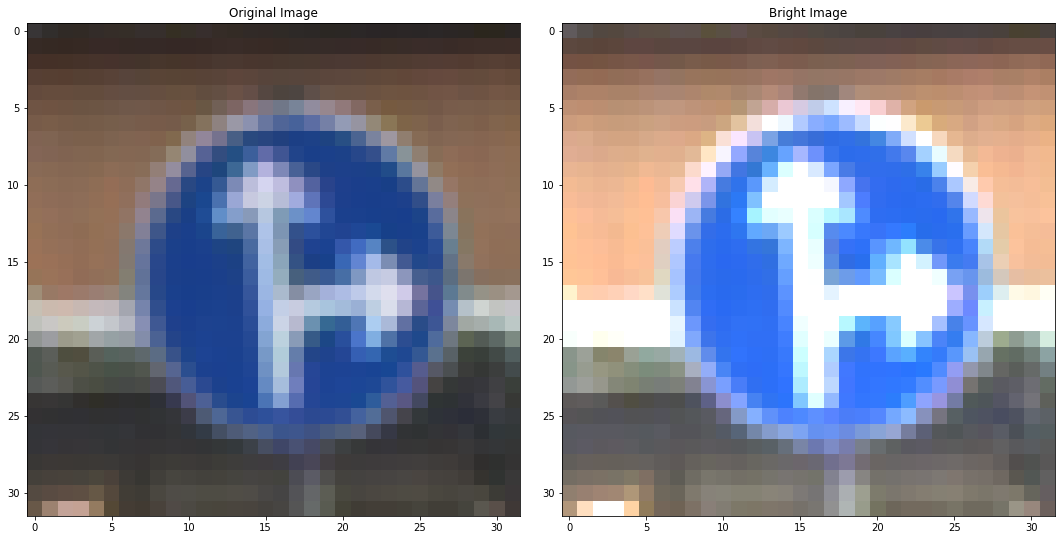

In [ ]:
index = random.randint(0,len(X_train)-1)
image= X_train[index]
label= y_train [index]
bright_image = img_random_brightness(image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(image)
axs[0].set_title('Original Image')
axs[1].imshow(bright_image)
axs[1].set_title('Bright Image')

print(label)

In [ ]:
augmented_zoom_image = []
augmented_zoom_label = []

for i in range(len(y_train)):
  img = X_train[i]
  label = y_train[i]
  zoomed_img = zoom(img)
  augmented_zoom_image.append(zoomed_img)
  augmented_zoom_label.append(label)

In [ ]:
augmented_pan_image = []
augmented_pan_label = []

for i in range(len(y_train)):
  img = X_train[i]
  label = y_train[i]
  panned_img = pan(img)
  augmented_pan_image.append(panned_img)
  augmented_pan_label.append(label)

In [ ]:
augmented_bright_image = []
augmented_bright_label = []

for i in range(len(y_train)):
  img = X_train[i]
  label = y_train[i]
  bright_img = img_random_brightness(img)
  augmented_bright_image.append(bright_img)
  augmented_bright_label.append(label)

In [ ]:
print('Balanced Dataset Before Augmentation(Image):', X_train.shape)
print('Balanced Dataset Before Augmentation(Label):', y_train.shape)
#change to np array
augmented_zoom_image = np.array(augmented_zoom_image)
augmented_pan_image = np.array(augmented_pan_image)
augmented_bright_image = np.array(augmented_bright_image)
X_train = np.array(X_train)
#concatenate
X_train = np.concatenate((X_train, augmented_zoom_image, augmented_pan_image, augmented_bright_image))


#change to np array
augmented_zoom_label = np.array(augmented_zoom_label) #250
augmented_pan_label = np.array(augmented_pan_label) #250
augmented_bright_label = np.array(augmented_bright_label) #250
y_train = np.array(y_train) #250
#concatenate
y_train = np.concatenate((y_train, augmented_zoom_label, augmented_pan_label, augmented_bright_label))

print('Balanced Dataset After Augmentation(Image):', X_train.shape)
print('Balanced Dataset After Augmentation(Label):', y_train.shape)

Balanced Dataset Before Augmentation(Image): (10360, 32, 32, 3)
Balanced Dataset Before Augmentation(Label): (10360,)
Balanced Dataset After Augmentation(Image): (41440, 32, 32, 3)
Balanced Dataset After Augmentation(Label): (41440,)


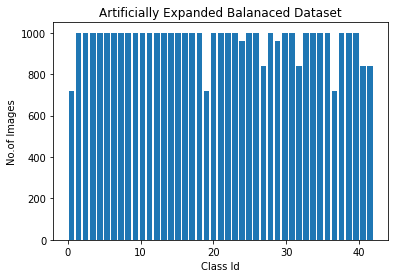

In [ ]:
num_bins = 43
plt.hist(y_train, bins =num_bins,rwidth=0.8)
plt.title('Artificially Expanded Balanaced Dataset')
plt.xlabel('Class Id')
plt.ylabel('No.of Images')
plt.show()

**3- Building a CNN on Tensorflow(Keras)**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, LSTM, Reshape, Input, Concatenate, GlobalMaxPool2D
from keras.models import Model

In [ ]:
print(keras.__version__)

2.4.0


In [ ]:
print(X_train[1].shape)

(32, 32, 3)


In [ ]:
def CNN_model():
  model = Sequential()

  #1st layer
  model.add(Conv2D(24, kernel_size=(5,5), strides=(1,1), input_shape=(WIDTH, HEIGHT,3), activation='relu'))

  #2nd layer
  model.add(Conv2D(36, kernel_size=(5,5), strides=(1,1), activation='relu'))

  #3rd layer
  model.add(Conv2D(48, kernel_size=(5,5), strides=(1,1), activation='relu'))
  
  #4th layer
  model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))

  #5th layer
  model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))


  #1st Dense Layer
  model.add(Flatten())
  model.add(Dense(250, activation='relu'))
  #model.add(Dropout(0.5))

  #2nd Dense Layer
  model.add(Dense(125, activation='relu'))
  #model.add(Dropout(0.5))

  #3rd Dense Layer
  model.add(Dense(75, activation='relu'))
  #model.add(Dropout(0.5))

  #output
  model.add(Dense(43, activation='softmax'))
  
  #Compile model
  model.compile(Adam(lr=0.0001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
  return model

In [ ]:
model = CNN_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 24)        1824      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 36)        21636     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 48)        43248     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 64)        27712     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 16384)             0         
_________________________________________________________________
dense (Dense)                (None, 250)               4

In [ ]:
def labels_to_one_hot(y_labels, num_classes):
  matrix_eye = np.eye(num_classes)
  y_labels_array = []
  for i in range(len(y_labels)):
    y_labels_array.append(matrix_eye[:,y_labels[i]])
  return np.array(y_labels_array)

In [ ]:
#change to hot encoded array!!
y_train = labels_to_one_hot(y_train, 43)
y_valid = labels_to_one_hot(y_valid, 43)

print(y_train.shape)
print(y_valid.shape)

(41440, 43)
(4410, 43)


**4- Training the CNN**

In [ ]:
history = model.fit(x=X_train, y=y_train, 
                    batch_size=32, 
                    epochs=10, 
                    verbose=1, 
                    validation_data=(X_valid, y_valid), 
                    shuffle=True)

Epoch 1/10
1295/1295 [==============================] - 472s 364ms/step - loss: 1.9381 - accuracy: 0.5522 - val_loss: 0.4841 - val_accuracy: 0.8934
Epoch 2/10
1295/1295 [==============================] - 472s 364ms/step - loss: 0.3077 - accuracy: 0.9273 - val_loss: 0.2869 - val_accuracy: 0.9413
Epoch 3/10
1295/1295 [==============================] - 473s 365ms/step - loss: 0.1302 - accuracy: 0.9680 - val_loss: 0.2158 - val_accuracy: 0.9531
Epoch 4/10
1295/1295 [==============================] - 468s 362ms/step - loss: 0.0942 - accuracy: 0.9783 - val_loss: 0.2091 - val_accuracy: 0.9590
Epoch 5/10
1295/1295 [==============================] - 470s 363ms/step - loss: 0.0535 - accuracy: 0.9876 - val_loss: 0.3040 - val_accuracy: 0.9454
Epoch 6/10
1295/1295 [==============================] - 472s 365ms/step - loss: 0.0488 - accuracy: 0.9886 - val_loss: 0.2358 - val_accuracy: 0.9619
Epoch 7/10
1295/1295 [==============================] - 471s 364ms/step - loss: 0.0462 - accuracy: 0.9892 - val_

Text(0.5, 0, 'epoch')

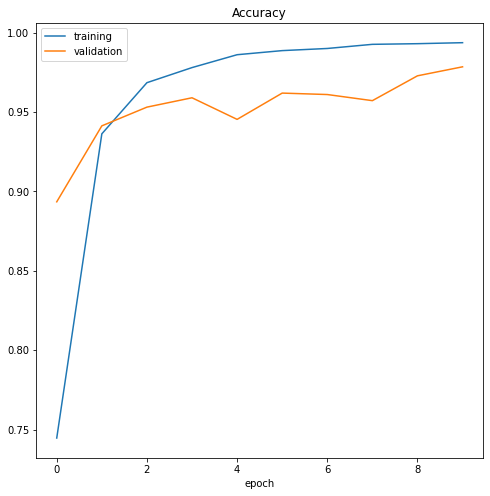

In [ ]:
plt.rcParams["figure.figsize"] = (8,8)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.title('Accuracy')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

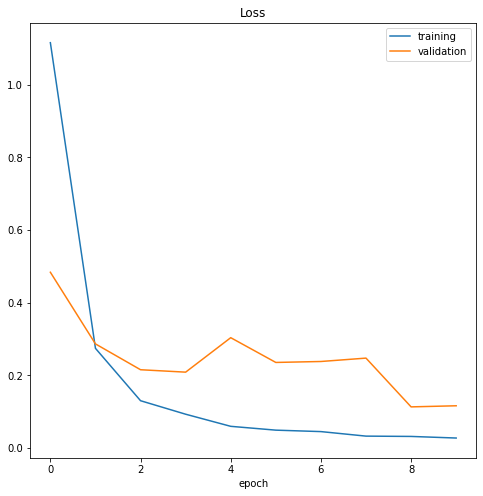

In [ ]:
plt.rcParams["figure.figsize"] = (8,8)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('epoch')

In [ ]:
X_test = test['features']
y_test = test['labels']

X_test = np.array(X_test)
y_test = np.array(y_test)

print(X_test.shape)
print(y_test.shape)

(12630, 32, 32, 3)
(12630,)


In [ ]:
y_test = labels_to_one_hot(y_test, 43)

Actual:  20
Prediction:  20


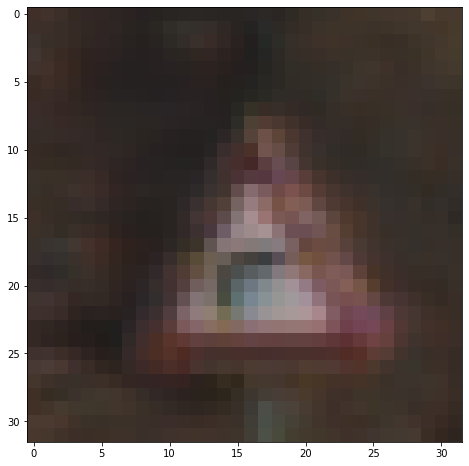

In [ ]:
index = random.randint(0,len(X_test)-1)
img_testing = X_test[index]
label_testing = y_test[index]

plt.imshow(img_testing)
print ("Actual: ", np.argmax(label_testing))
img_testing = img_testing.reshape(-1, WIDTH,HEIGHT,3)

print ("Prediction: ", np.argmax(model.predict(img_testing)))

**5- Evaluate and Save the Trained Model**

In [ ]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(X_test, y_test)
print("test loss, test acc:", results)

Evaluate on test data
395/395 [==============================] - 33s 83ms/step - loss: 0.2969 - accuracy: 0.9515
test loss, test acc: [0.29690027236938477, 0.951543927192688]


In [ ]:
model.save('traffic.h5')